In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
data_dir = '/home/salman/.keras/datasets/horse_or_human'

In [3]:
valid_size = .2

In [4]:
# Normalize the test and train sets with torchvision
train_transforms = transforms.Compose([transforms.Resize(224),
                                           transforms.ToTensor(),
                                           ])

test_transforms = transforms.Compose([transforms.Resize(224),
                                          transforms.ToTensor(),
                                          ])

In [5]:
# ImageFolder class to load the train and test images
train_data = datasets.ImageFolder(data_dir, transform=train_transforms)
test_data = datasets.ImageFolder(data_dir, transform=test_transforms)

In [6]:
train_data.classes

['horses', 'humans']

In [7]:
# Number of train images
num_train = len(train_data)
indices = list(range(num_train))

In [8]:
num_train

1027

In [9]:
# Split = 20% of train images
split = int(np.floor(valid_size * num_train))
# Shuffle indices of train images
np.random.shuffle(indices)

In [10]:
print(split)

205


In [11]:
indices

[363,
 573,
 416,
 262,
 798,
 704,
 194,
 980,
 1010,
 186,
 609,
 64,
 264,
 527,
 123,
 602,
 307,
 473,
 55,
 351,
 823,
 860,
 1020,
 320,
 839,
 339,
 644,
 593,
 207,
 502,
 946,
 25,
 265,
 708,
 713,
 941,
 589,
 88,
 801,
 877,
 935,
 993,
 645,
 184,
 834,
 907,
 134,
 675,
 449,
 642,
 71,
 484,
 566,
 793,
 720,
 68,
 128,
 634,
 630,
 482,
 813,
 771,
 957,
 867,
 525,
 136,
 909,
 692,
 317,
 631,
 58,
 977,
 584,
 342,
 765,
 159,
 725,
 1007,
 7,
 781,
 575,
 614,
 613,
 9,
 503,
 871,
 607,
 578,
 255,
 117,
 344,
 31,
 670,
 454,
 168,
 395,
 155,
 788,
 965,
 574,
 29,
 1014,
 462,
 305,
 745,
 4,
 789,
 288,
 581,
 219,
 632,
 905,
 872,
 816,
 1000,
 350,
 880,
 114,
 518,
 496,
 460,
 284,
 160,
 78,
 696,
 211,
 809,
 999,
 794,
 121,
 850,
 511,
 521,
 952,
 75,
 945,
 841,
 175,
 201,
 892,
 528,
 83,
 990,
 383,
 279,
 893,
 189,
 378,
 702,
 847,
 386,
 332,
 815,
 975,
 1016,
 263,
 636,
 549,
 13,
 852,
 886,
 236,
 0,
 711,
 822,
 817,
 226,
 389,
 796,
 

In [12]:
# Subset indices for test and train
train_idx, test_idx = indices[split:], indices[:split]

In [13]:
len(train_idx)

822

In [14]:
len(test_idx)

205

In [15]:
# Samples elements randomly from a given list of indices
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

In [16]:
# Batch and load the images
trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=10)
testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=10)

In [18]:
print(trainloader.dataset.classes)

['horses', 'humans']


In [20]:
examples = iter(trainloader)
samples ,labels = next(examples)
samples.shape

torch.Size([10, 3, 224, 224])

In [21]:
labels.shape

torch.Size([10])

In [22]:
# Label.unsqueeze(1).float()

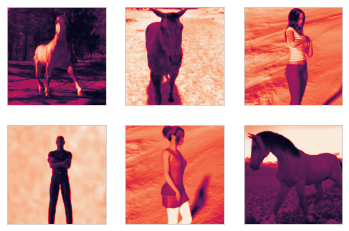

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples[i][0])
plt.show()

In [24]:
def imshow(img,title):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(25,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(title)
    plt.show()

In [25]:
out = torchvision.utils.make_grid(samples)

In [26]:
class_name = train_data.classes

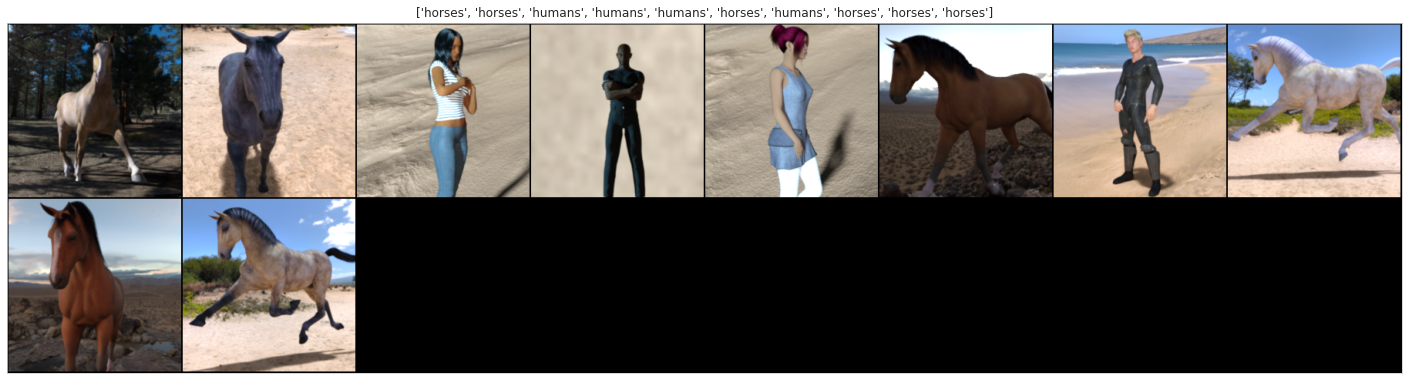

In [27]:
imshow(out,title=[class_name[x] for x in labels])

In [28]:
# Single image plt

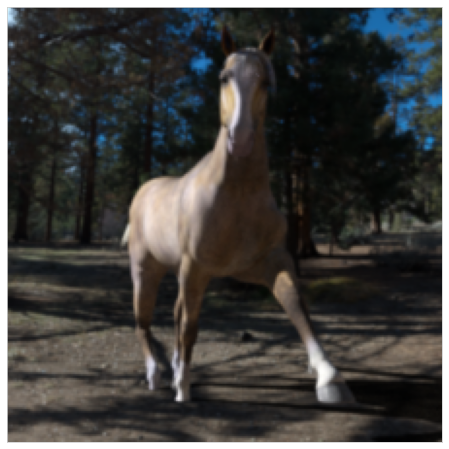

In [29]:
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.title(title)
    plt.show()
imshow(samples[0])

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [31]:
device

device(type='cpu')

In [32]:
model = models.resnet50(pretrained=True)

/home/salman/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/salman/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/salman/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [33]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [34]:
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 1))
                                 # nn.LogSoftmax(dim=1))

In [35]:
model.fc

Sequential(
  (0): Linear(in_features=2048, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=512, out_features=1, bias=True)
)

In [36]:
from torch.nn.modules.loss import BCEWithLogitsLoss
criterion = BCEWithLogitsLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [37]:
#Train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.unsqueeze(1).float()
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (epoch+1) % 1 == 0:    # 
            print(f'epoch:{epoch+1},loss={running_loss}')
            running_loss = 0.0

print('Finished Training')

epoch:1,loss=0.7536352872848511
epoch:1,loss=3.117142915725708
epoch:1,loss=1.340928077697754
epoch:1,loss=1.1333262920379639
epoch:1,loss=2.335472583770752
epoch:1,loss=2.7445783615112305
epoch:1,loss=1.0079596042633057
epoch:1,loss=0.587304413318634
epoch:1,loss=1.1136705875396729
epoch:1,loss=0.9366358518600464
epoch:1,loss=0.6211219429969788
epoch:1,loss=0.3606697618961334
epoch:1,loss=0.27435168623924255
epoch:1,loss=0.3741651773452759
epoch:1,loss=0.5229182839393616
epoch:1,loss=0.6446455717086792
epoch:1,loss=0.6546264290809631
epoch:1,loss=0.1698622703552246
epoch:1,loss=0.1030101627111435
epoch:1,loss=0.09406542032957077
epoch:1,loss=0.10810647904872894
epoch:1,loss=0.5407797694206238
epoch:1,loss=0.7813670635223389
epoch:1,loss=0.15299125015735626
epoch:1,loss=0.19638413190841675
epoch:1,loss=0.16225950419902802
epoch:1,loss=0.07096509635448456
epoch:1,loss=0.07207529991865158
epoch:1,loss=0.1415170133113861
epoch:1,loss=0.0699678435921669
epoch:1,loss=0.09354493021965027
epo

In [38]:
samples[0].shape

torch.Size([3, 224, 224])

In [39]:
type(samples[0])

torch.Tensor

In [40]:
test = samples[4].view(1,3,224,224)

In [41]:
test.shape

torch.Size([1, 3, 224, 224])

In [42]:
test = test.to(device)

In [43]:
model(test)

tensor([[4.8836]], grad_fn=<AddmmBackward0>)